<a href="https://colab.research.google.com/github/hakdj/teamproject2_final/blob/master/0917_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 도구 모음

In [ ]:
!pip install konlpy

In [3]:
import nltk  # natural language toolkit
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import konlpy
from konlpy.tag import Okt
okt = Okt() # 형태소 추출
from konlpy.tag import Twitter # 한글 형태소 추출

from collections import Counter # count 

import pandas as pd
import numpy as np

# 파일 가져오기

In [8]:
df=pd.read_csv('./youtubecomment.csv',encoding='cp949')

### 원하는 농수산물 선택해서 list에 담기

In [61]:
lists=[]
ans=input()
for i in range(0,len(df)):
  if df['title'][i]==ans:
    lists.append(df['comment'][i])
len(lists)


열무


117

In [ ]:
# 담긴 내용 확인용
lists

### 이모티콘 제거
### 코멘트 df 생성 및 저장

In [ ]:
import re

In [ ]:
#이모티콘 제거
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

In [82]:
#코멘트 df생성 및 저장
comment_result = []
for i in range(0,len(lists)):
  tokens = re.sub(emoji_pattern,"", lists[i])
  tokens = re.sub(han,"",tokens)
  comment_result.append(tokens)

comment_result = pd.DataFrame(comment_result, columns=["comment"])
#comment_result
comment_result.to_csv("./코멘트.csv",index=False, encoding='CP949')
type(comment_result)

pandas.core.frame.DataFrame

# 분석

### 명사 전처리 및 빈도 출력

In [ ]:
twitter = Twitter() 
morphs = [] 
for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 

In [ ]:
#확인용
morphs

In [80]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Alpha'] and ("또" not in word)and ("등" not in word)and ("앞" not in word)and ("생" not in word)and ("를" not in word)and ("여기" not in word)and ("다른" not in word)and ("예" not in word)and ("은" not in word)and ("위해" not in word)and ("다음" not in word)and ("대한" not in word)and ("아주" not in word)and ("그" not in word)and ("도움" not in word)and ("약" not in word)and ("때문" not in word)and ("여러" not in word) and ("더" not in word) and ("이" not in word) and ("의" not in word) and ("및" not in word) and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word) : 
            noun_adj_adv_list.append(word) 
        if tag in ['Noun'] and ("또" not in word)and ("등" not in word)and ("앞" not in word)and ("생" not in word)and ("를" not in word)and ("여기" not in word)and ("다른" not in word)and ("예" not in word)and ("은" not in word)and ("위해" not in word)and ("다음" not in word)and ("대한" not in word)and ("아주" not in word)and ("그" not in word)and ("도움" not in word)and ("약" not in word)and ("때문" not in word)and ("여러" not in word) and ("더" not in word) and ("이" not in word) and ("의" not in word) and ("및" not in word) and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word) : 
            noun_adj_adv_list.append(word) 
print(noun_adj_adv_list)

['저희', '어머니', 'Mhm', 'i', 'wonder', 'if', 'i', 'can', 'use', 'green', 'mustard', 'instead', 'of', 'young', 'radishes', 'It', 's', 'not', 'available', 'in', 'my', 'area', '오늘', '덕분', '점심', '친정', '텃밭', '온', '열무', '고', '제대로', '항상', '왜', '노랑', '색', '열무', '데', '꼭', '고소', '단점', '국물', '읍', '뻑뻑', '역시', '백종원', '레시피', '당장', '해먹', '저', '정보', '좀', '빛', '자', '알', '판끼', '열무', '항상', '김치', '해', '오늘', '밥', '해', '너', '무', '역시', '굿', '굿굿굿', '사라', '거', '형님', '된장', '쥬', '된장', '어유', '됫', '기', '거', '잡솨', '형', '만능', '사라', '거', '돠', '저', '요리', '요리', '저', '요리', '계속', '요리', '해', '응원', '열무', '열무', '해먹', '김', '열무', '양념', '간장', '별미', '오늘', '열무', '대신', '가지', '존맛', '료', '준비', '도중', '식용유', '올리브유', '걱정', '된장', '고추장', '향', '올리브', '향', '다행', '고온', '엑스트라', '버진', '타', '가지', '올리브유', '궁합', '인분', '정도', '쟁', '거', '진짜', '배추', '거', '양배추', '쌈', '진짜', '존맛', '양배추', '통', '혼자', '돼지고기', '시금치', '청량고추', '밥', '해먹', '시금치', '열무', '해도', '미국', '무심', '거', '맛', '설', '막', '얼', '배추', '식감', '삭', '열무', '버전', '보리밥', '맛', '청양고추', '꼭', '풋', '고추', '오리

In [81]:
count = Counter(noun_adj_adv_list)
words = dict(count.most_common())
print(words)

{'열무': 42, '거': 20, '맛': 20, '된장': 14, '해': 13, '진짜': 13, '요리': 12, '열무김치': 12, '레시피': 10, '밥': 9, '융': 9, '오늘': 8, '백종원': 8, '해먹': 8, '항상': 7, '저': 7, '좀': 7, '보고': 7, '요': 6, '집': 6, '때': 6, '최고': 6, '왜': 5, '꼭': 5, '향': 5, '해도': 5, '삭': 5, '방송': 5, '역시': 4, '유': 4, '영상': 4, '여름': 4, '쌤': 4, '음식': 4, '홍보': 4, '덕분': 3, '온': 3, '국물': 3, '알': 3, '김치': 3, '가지': 3, '존맛': 3, '정도': 3, '쌈': 3, '돼지고기': 3, '시금치': 3, '얼': 3, '방법': 3, '애': 3, '처음': 3, '완전': 3, '감사': 3, '주부': 3, '입맛': 3, '소리': 3, '글': 3, '어디': 3, 'gt': 3, 'lt': 3, '난': 3, '냉면': 3, '활용': 3, '줄': 3, '대표': 3, '마음': 3, '사진': 3, '사용': 3, '저희': 2, 'i': 2, 'use': 2, 'of': 2, 'in': 2, 'my': 2, '정보': 2, '무': 2, '사라': 2, '형님': 2, '양념': 2, '준비': 2, '올리브유': 2, '고추장': 2, '배추': 2, '양배추': 2, '통': 2, '식감': 2, '보리밥': 2, '간': 2, 'g': 2, '다시': 2, '뿌리': 2, '고기': 2, '냄새': 2, '사람': 2, '개인': 2, '강추': 2, '조합': 2, '진심': 2, '용': 2, '하루': 2, '잎': 2, '로': 2, '점점': 2, '대박': 2, '참고': 2, '장사': 2, '식당': 2, '출연': 2, '개맛': 2, '메뉴': 2, '로만': 2, '정상': 2, '장': 2, '특

### 시각화

In [53]:
from wordcloud import WordCloud # 텍스트 시각화
import matplotlib.pyplot as plt # 시각화 패키지
import matplotlib 
from IPython.display import set_matplotlib_formats

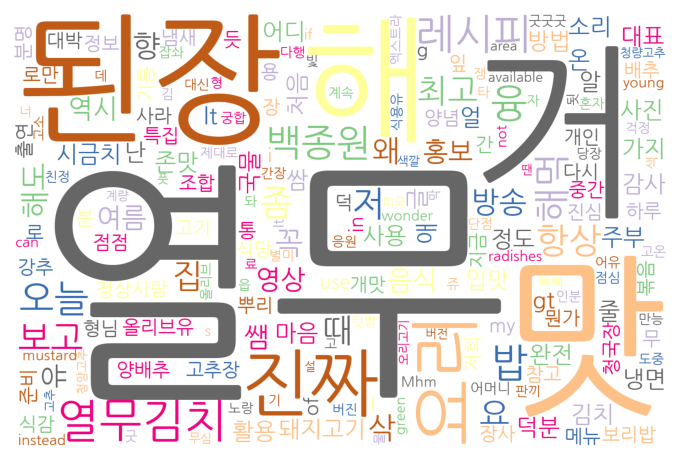

In [56]:
#word cloud show
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

wordcloud = WordCloud(font_path = '/content/Nanum.TTF', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(words) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

### 그래프

In [117]:
import matplotlib.pylab as plt2
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = "/content/NanumSquareL.ttf"
fontprop = fm.FontProperties(fname=path, size=20) # 글자 크기 조정

In [ ]:
def get_noun(comment_txt):
    twitter = Twitter()
    # okt = Okt()
    noun = []
    
    if len(comment_txt)>0:
        tw = twitter.pos(comment_txt)
        for i,j in tw:
            if j == 'Noun':
                noun.append(i)
    return noun
 
comment_result['token'] = comment_result['comment'].apply(lambda x: get_noun(x))
type(comment_result)



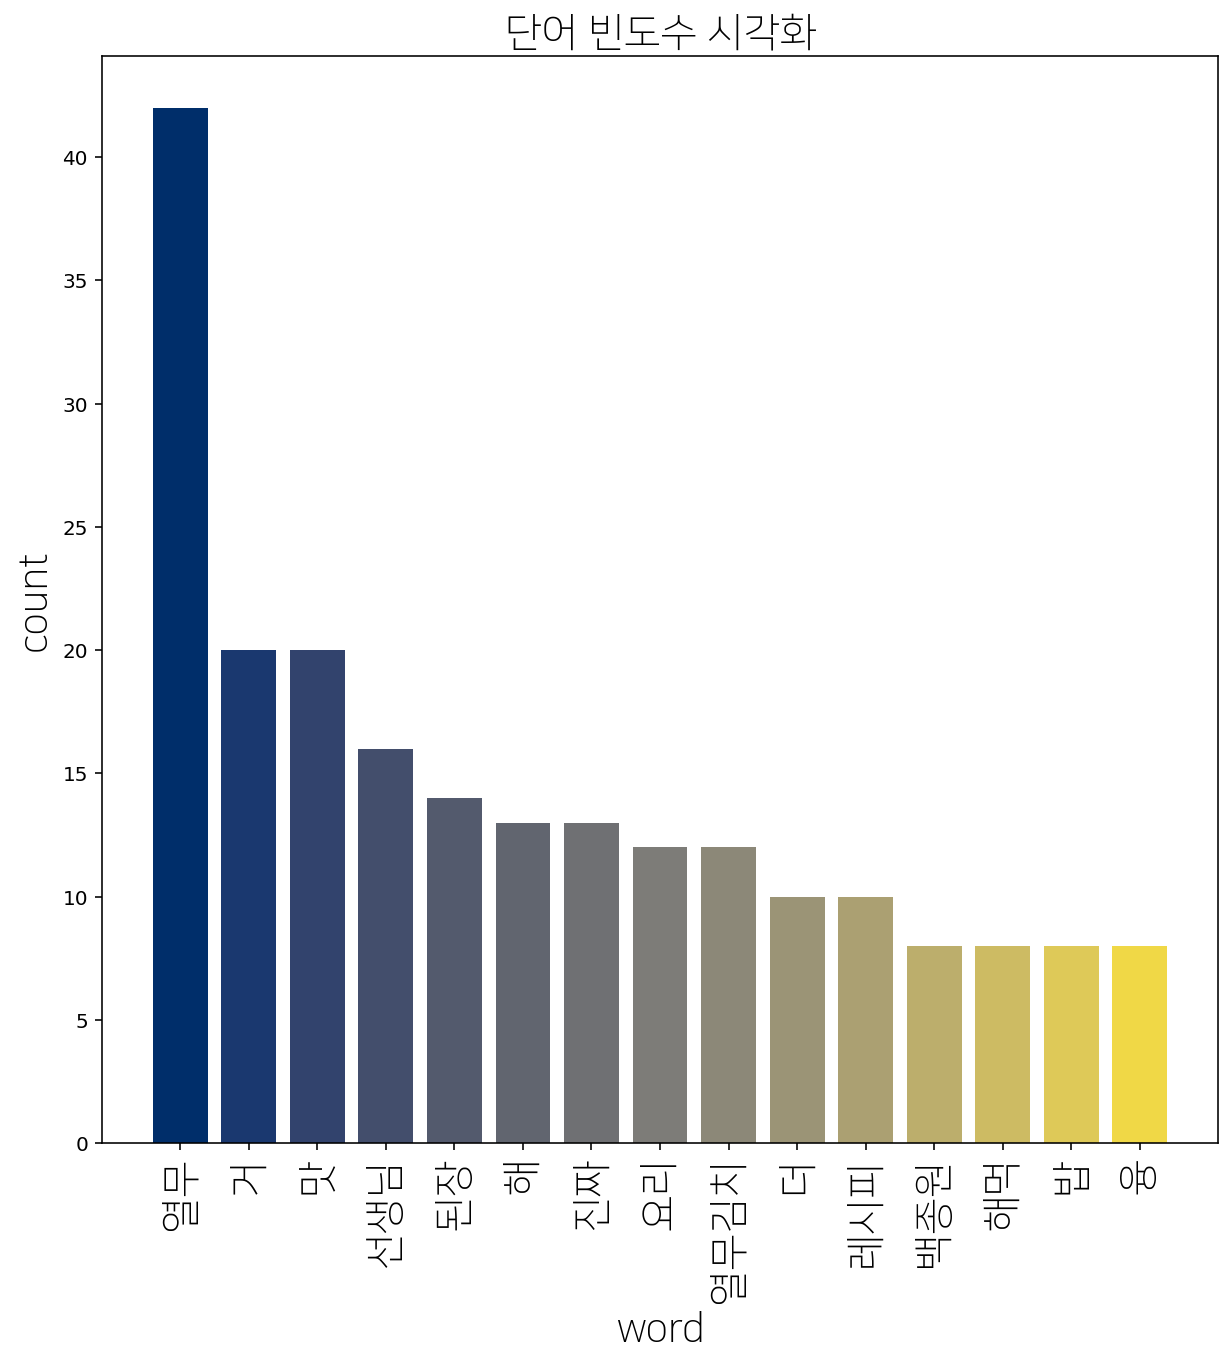

In [148]:

noun_list = []
for i in range(len(comment_result)):
    for j in range(len(comment_result['token'].iloc[i])):
        noun_list.append(comment_result['token'].iloc[i][j])
        
counts = Counter(noun_list)
tags = counts.most_common(15)

#bar chart
test = pd.DataFrame({'word':[],
                    'count':[]})
for i in range(len(tags)):
    word = tags[i][0]
    count = tags[i][1]
    
    insert_data = pd.DataFrame({'word':[word],
                                'count':[count]})
    test = test.append(insert_data)

test.index = range(len(test))

#차트에 컬러넣기
import seaborn as sns
colors = sns.color_palette('cividis',len(test))
#그리고 밑에다가 plt.차트형식(괄호 안에 color=추가)



index = np.arange(len(test))
plt2.bar(index,test['count'].tolist(),color=colors)
plt2.xlabel('word', fontsize=8, fontproperties=fontprop)
plt2.ylabel('count', fontsize=8, fontproperties=fontprop)
plt2.xticks(index, test['word'].tolist(), fontsize=1, fontproperties=fontprop, rotation=90)
plt2.title('단어 빈도수 시각화',  fontsize=12, fontproperties=fontprop)
plt2.rcParams['figure.figsize'] = [10, 5]
fig2 = plt2.figure(1)
fig2.set_size_inches(10, 10) # 사이즈 조정

plt2.show()



### komoran

In [67]:
from konlpy.tag import Komoran
komoran=Komoran()

In [ ]:
ko_tokens=komoran.morphs(comment_result['comment'][29])
ko_tokens

In [145]:
nouns=komoran.nouns(comment_result['comment'][29])
nouns=[noun for noun in nouns if len(noun)>=2]
nouns

['구독자', '한국인', '한국', '사람', '구독', '화이팅']

In [ ]:
comment_result